In [ ]:
inputs = [ 1 , 2 , 3 , 2.5 ]

weights = [[ 0.2 , 0.8 , - 0.5 , 1 ],
           [ 0.5 , - 0.91 , 0.26 , - 0.5 ],
           [ - 0.26 , - 0.27 , 0.17 , 0.87 ]]

biases = [ 2 , 3 , 0.5 ]

# Output of current layer
layer_outputs = []

# For each neuron
for neuron_weights, neuron_bias in zip (weights, biases):
  # Zeroed output of given neuron
  neuron_output = 0
  # For each input and weight to the neuron
  for n_input, weight in zip (inputs, neuron_weights):
    # Multiply this input by associated weight
    # and add to the neuron’s output variable
    neuron_output += n_input * weight
  # Add bias
  neuron_output += neuron_bias
  # Put neuron’s result to the layer’s output list
  layer_outputs.append(neuron_output)
print (layer_outputs)

[4.8, 1.21, 2.385]


---


A Single Neuron with NumPy

In [ ]:
import numpy as np
outputs = np.dot(weights, inputs) + bias
print (outputs)

[4.8   0.21  3.885]


---

Multiple layers:

In [ ]:
inputs = [[ 1 , 2 , 3 , 2.5 ],
[ 2. , 5. , - 1. , 2 ],
[ - 1.5 , 2.7 , 3.3 , - 0.8 ]]
weights = [[ 0.2 , 0.8 , - 0.5 , 1 ],
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
biases = [ 2 , 3 , 0.5 ]
weights2 = [[ 0.1 , - 0.14 , 0.5 ],
[ - 0.5 , 0.12 , - 0.33 ],
[ - 0.44 , 0.73 , - 0.13 ]]
biases2 = [ - 1 , 2 , - 0.5 ]

In [ ]:
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer1_outputs.shape

(3, 3)

In [ ]:
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
layer2_outputs.shape

(3, 3)

---




Training Data

In [ ]:
!pip install nnfs

In [ ]:
import numpy as np
import nnfs

from nnfs.datasets import spiral_data
nnfs.init()

The nnfs.init() does three things: it sets the random seed to 0 (by the default), creates a
float32 dtype default, and overrides the original dot product from NumPy. All of these are meant
to ensure repeatable results for following along.

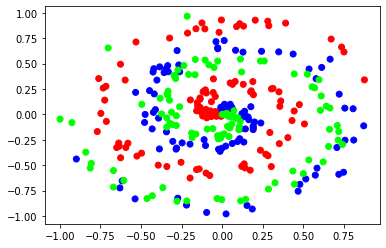

In [ ]:
import matplotlib.pyplot as plt
X, y = spiral_data( samples = 100 , classes = 3 )

X.shape, y.shape

plt.scatter(X[:, 0 ], X[:, 1 ], c = y, cmap = 'brg' )
plt.show()

---

**Dense Layer Class**

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()
# Dense layer
class Layer_Dense :

  # Layer initialization
  def __init__ ( self , n_inputs , n_neurons ):
    # Initialize weights and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros(( 1 , n_neurons))

  # Forward pass
  def forward ( self , inputs ):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases
  

In [ ]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )
print(X.shape, y.shape)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Let's see output of the first few samples:
print (dense1.output[: 5 ])

(300, 2) (300,)
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


---

**ReLU Activation Function Code**

In [ ]:
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = []
for i in inputs:
  output.append( max ( 0 , i))
print (output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [ ]:
import numpy as np
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = np.maximum( 0 , inputs)
print (output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [ ]:
# ReLU activation
class Activation_ReLU :
  
  # Forward pass
  def forward ( self , inputs ):
    # Calculate output values from input
    self.output = np.maximum( 0 , inputs)

In [ ]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)

# Let's see output of the first few samples:
print (activation1.output[: 5 ])

[[0.         0.         0.        ]
 [0.00013767 0.         0.        ]
 [0.00022187 0.         0.        ]
 [0.0004077  0.         0.        ]
 [0.00054541 0.         0.        ]]


---

The Softmax Activation Function

In [34]:
import numpy as np

# Values from the earlier previous when we described
# what a neural network is
layer_outputs = [ 4.8 , 1.21 , 2.385 ]

# For each value in a vector, calculate the exponential value
exp_values = np.exp(layer_outputs)
print ( 'exponentiated values:' )
print (exp_values)

# Now normalize values
norm_values = exp_values / np.sum(exp_values)
print ( 'normalized exponentiated values:' )

print (norm_values)
print ( 'sum of normalized values:' , np.sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


In [35]:
# Softmax activation
class Activation_Softmax :

  # Forward pass
  def forward ( self , inputs ):

    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis = 1 , keepdims = True ))

    # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis = 1 , keepdims = True )
    
    self.output = probabilities

In [36]:
softmax = Activation_Softmax()
softmax.forward([[ 1 , 2 , 3 ]])
print (softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [37]:
softmax.forward([[ - 2 , - 1 , 0 ]]) # subtracted 3 - max from the list
print (softmax.output)

[[0.09003057 0.24472847 0.66524096]]


---

In [40]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense( 3 , 3 )

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)
print(dense1.output.shape)

# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
print(activation1.output.shape)

# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
print(dense2.output.shape)

# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
print(activation2.output.shape)

# Let's see output of the first few samples:
print (activation2.output[: 5 ])

(300, 3)
(300, 3)
(300, 3)
(300, 3)
[[0.33333334 0.33333334 0.33333334]
 [0.3333336  0.33333313 0.3333333 ]
 [0.3333337  0.33333302 0.3333333 ]
 [0.33333385 0.33333287 0.33333328]
 [0.33333433 0.33333242 0.33333322]]


---

Full Code for Dense Layer and Activation Functions

In [43]:
import numpy as np
import nnfs 

from nnfs.datasets import spiral_data
nnfs.init()

# Dense layer
class Layer_Dense :
  # Layer initialization
  def __init__ ( self , n_inputs , n_neurons ):
    # Initialize weights and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros(( 1 , n_neurons))
    # Forward pass

  def forward ( self , inputs ):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU :
  # Forward pass
  def forward ( self , inputs ):
    # Calculate output values from inputs
    self.output = np.maximum( 0 , inputs)

# Softmax activation
class Activation_Softmax :
  # Forward pass
  def forward ( self , inputs ):
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis = 1 ,
    keepdims = True ))
    # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis = 1 ,
    keepdims = True )
    self.output = probabilities


In [44]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense( 3 , 3 )

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# Let's see output of the first few samples:
print (activation2.output[: 5 ])

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


---

np.sum along different axis

In [47]:
layer_outputs = np.array([[ 4.8 , 1.21 , 2.385 ],
[ 8.9 , - 1.81 , 0.2 ],
[ 1.41 , 1.051 , 0.026 ]])
print ( 'Another way to think of it w/ a matrix == axis 0: columns:' )
print (np.sum(layer_outputs, axis = 0, keepdims=True ))
print ( 'So we can sum axis 1, but note the current shape:' )
print (np.sum(layer_outputs, axis = 1, keepdims=True ))

Another way to think of it w/ a matrix == axis 0: columns:
[[15.11   0.451  2.611]]
So we can sum axis 1, but note the current shape:
[[8.395]
 [7.29 ]
 [2.487]]


---

Categorical Cross-Entropy Loss

In [54]:
softmax_outputs =  np.array([[ 0.7 , 0.1 , 0.2 ],
                   [ 0.1 , 0.5 , 0.4 ],
                   [ 0.02 , 0.9 , 0.08 ]])
class_targets = [ 0 , 1 , 1 ]
neg_log = -1 * np.log( softmax_outputs[range(len(softmax_outputs)), class_targets])
average_loss = np.mean(neg_log)
print (average_loss)

0.38506088005216804


In [56]:
import numpy as np
softmax_outputs = np.array([[ 0.7 , 0.1 , 0.2 ],
                            [ 0.1 , 0.5 , 0.4 ],
                            [ 0.02 , 0.9 , 0.08 ]])
class_targets = np.array([[ 1 , 0 , 0 ],
                          [ 0 , 1 , 0 ],
                          [ 0 , 1 , 0 ]])


In [57]:
# Probabilities for target values -
# only if categorical labels
if len(class_targets.shape) == 1 :
  correct_confidences = softmax_outputs[range(len(softmax_outputs)),class_targets]
elif len(class_targets.shape) == 2 :
  correct_confidences = np.sum(softmax_outputs * class_targets,axis = 1)

print(correct_confidences)
# Losses
neg_log = - np.log(correct_confidences)

average_loss = np.mean(neg_log)

print (average_loss)

[0.7 0.5 0.9]
0.38506088005216804


**Categorical Cross-Entropy Loss Class**

In [58]:
# Common loss class
class Loss :
  
  # Calculates the data and regularization losses
  # given model output and ground truth values
  def calculate ( self , output , y ):
    # Calculate sample losses
    sample_losses = self.forward(output, y)

    # Calculate mean loss
    data_loss = np.mean(sample_losses)
    
    # Return loss
    return data_loss

In [60]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy ( Loss ):
  
  # Forward pass
  def forward( self , y_pred , y_true ):
    # Number of samples in a batch
    samples = len(y_pred)

    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7 , 1 - 1e-7 )

    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1 :
      correct_confidences = y_pred_clipped[range(samples),y_true]
    elif len(y_true.shape) == 2 : # Mask values - only for one-hot encoded labels
      correct_confidences = np.sum(y_pred_clipped * y_true, axis = 1)

    # Losses
    negative_log_likelihoods = - np.log(correct_confidences)

    return negative_log_likelihoods

In [61]:
softmax_outputs = np.array([[ 0.7 , 0.1 , 0.2 ],
                            [ 0.1 , 0.5 , 0.4 ],
                            [ 0.02 , 0.9 , 0.08 ]])
class_targets = np.array([[ 1 , 0 , 0 ],
                          [ 0 , 1 , 0 ],
                          [ 0 , 1 , 0 ]])

loss_function = Loss_CategoricalCrossentropy()

loss = loss_function.calculate(softmax_outputs, class_targets)

print (loss)

0.38506088005216804


Summarize:

In [63]:
import numpy as np
import nnfs 

from nnfs.datasets import spiral_data
nnfs.init()

# Dense layer
class Layer_Dense :
  # Layer initialization
  def __init__ ( self , n_inputs , n_neurons ):
    # Initialize weights and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros(( 1 , n_neurons))
    # Forward pass

  def forward ( self , inputs ):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU :
  # Forward pass
  def forward ( self , inputs ):
    # Calculate output values from inputs
    self.output = np.maximum( 0 , inputs)

# Softmax activation
class Activation_Softmax :
  # Forward pass
  def forward ( self , inputs ):
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis = 1 , keepdims = True ))

    # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True )
    
    self.output = probabilities

# Common loss class
class Loss :  
  # Calculates the data and regularization losses
  # given model output and ground truth values
  def calculate ( self , output , y ):
    # Calculate sample losses
    sample_losses = self.forward(output, y)

    # Calculate mean loss
    data_loss = np.mean(sample_losses)
    
    # Return loss
    return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy ( Loss ):
  # Forward pass
  def forward( self , y_pred , y_true ):
    # Number of samples in a batch
    samples = len(y_pred)

    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7 , 1 - 1e-7 )

    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1 :
      correct_confidences = y_pred_clipped[range(samples),y_true]
    elif len(y_true.shape) == 2 : # Mask values - only for one-hot encoded labels
      correct_confidences = np.sum(y_pred_clipped * y_true, axis = 1)

    # Losses
    negative_log_likelihoods = - np.log(correct_confidences)

    return negative_log_likelihoods

In [67]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense( 3 , 3 )

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# Let's see output of the first few samples:
print (activation2.output[: 5 ])

# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis = 1 )

if len (y.shape) == 2 :
  y = np.argmax(y, axis=1)

accuracy = np.mean(predictions == y)

# Print accuracy
print ( 'acc:' , accuracy)

# Print loss value
print ( 'loss:' , loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33333355 0.33333322 0.3333332 ]
 [0.33333382 0.33333313 0.3333331 ]
 [0.3333341  0.33333302 0.33333293]
 [0.33333433 0.3333329  0.33333278]]
acc: 0.33666666666666667
loss: 1.0986081


---

**Accuracy Calculation**

In [68]:
import numpy as np

# Probabilities of 3 samples
softmax_outputs = np.array([[ 0.7 , 0.2 , 0.1 ], 
                            [ 0.5 , 0.1 , 0.4 ], 
                            [ 0.02 , 0.9 , 0.08 ]])

# Target (ground-truth) labels for 3 samples
class_targets = np.array([ 0 , 1 , 1 ])

# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis = 1)

# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2 :
  class_targets = np.argmax(class_targets, axis = 1 )

# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)

print ( 'acc:' , accuracy)

acc: 0.6666666666666666


---

**Introducing Optimization**

In [69]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()

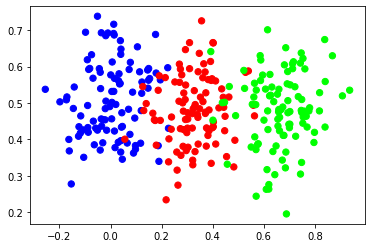

In [70]:
X, y = vertical_data( samples = 100 , classes = 3 )
plt.scatter(X[:, 0 ], X[:, 1 ], c = y, s = 40 , cmap = 'brg' )
plt.show()

In [71]:
# Create dataset
X, y = vertical_data( samples = 100 , classes = 3 )

# Create model
dense1 = Layer_Dense( 2 , 3 ) # first dense layer, 2 inputs

activation1 = Activation_ReLU()

dense2 = Layer_Dense( 3 , 3 ) # second dense layer, 3 inputs, 3 outputs

activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

In [72]:
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

Updating weights and biases randomly and checking the loss and accuracy

In [73]:
for iteration in range ( 10000 ):
  # Generate a new set of weights for iteration
  dense1.weights = 0.05 * np.random.randn( 2 , 3 )
  dense1.biases = 0.05 * np.random.randn( 1 , 3 )
  dense2.weights = 0.05 * np.random.randn( 3 , 3 )
  dense2.biases = 0.05 * np.random.randn( 1 , 3 )

  # Perform a forward pass of the training data through this layer
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  # Perform a forward pass through activation function
  # it takes the output of second dense layer here and returns loss
  loss = loss_function.calculate(activation2.output, y)

  # Calculate accuracy from output of activation2 and targets
  # calculate values along first axis
  predictions = np.argmax(activation2.output, axis = 1 )
  accuracy = np.mean(predictions == y)

  # If loss is smaller - print and save weights and biases aside
  if loss < lowest_loss:
    print ( 'New set of weights found, iteration:' , iteration, 'loss:' , loss, 'acc:' , accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.1016203 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.1002508 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0992025 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986239 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0984299 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0976521 acc: 0.36333333333333334
New set of weights found, iteration: 150 loss: 1.0974255 acc: 0.3333333333333333
New set of weights found, iteration: 874 loss: 1.0972673 acc: 0.3333333333333333
New set of weights found, iteration: 894 loss: 1.096895 acc: 0.3333333333333333
New set of weights found, iteration: 1036 loss: 1.0954281 acc: 0.3333333333333333


Instead of setting parameters with randomly-chosen values each iteration, apply a fraction of these values to parameters. With this, weights will be updated from what currently yields us the lowest loss instead of aimlessly randomly. If the adjustment decreases loss, we will make it the new point to adjust from. If loss instead increases due to the adjustment, then we will revert to the previous point.

In [74]:
for iteration in range ( 10000 ):
  # Update weights with some small random values
  dense1.weights += 0.05 * np.random.randn( 2 , 3 )
  dense1.biases += 0.05 * np.random.randn( 1 , 3 )
  dense2.weights += 0.05 * np.random.randn( 3 , 3 )
  dense2.biases += 0.05 * np.random.randn( 1 , 3 )

  # Perform a forward pass of the training data through this layer
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  # Perform a forward pass through activation function
  # it takes the output of second dense layer here and returns loss
  loss = loss_function.calculate(activation2.output, y)

  # Calculate accuracy from output of activation2 and targets
  # calculate values along first axis
  predictions = np.argmax(activation2.output, axis = 1 )
  accuracy = np.mean(predictions == y)

  # If loss is smaller - print and save weights and biases aside
  if loss < lowest_loss:
    print ( 'New set of weights found, iteration:' , iteration, 'loss:' , loss, 'acc:' , accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss
    # Revert weights and biases
  else :
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 5 loss: 1.0946134 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.0942385 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0933579 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0894163 acc: 0.3333333333333333
New set of weights found, iteration: 18 loss: 1.0869116 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.08632 acc: 0.3333333333333333
New set of weights found, iteration: 20 loss: 1.0809617 acc: 0.66
New set of weights found, iteration: 21 loss: 1.076914 acc: 0.42
New set of weights found, iteration: 22 loss: 1.0763092 acc: 0.4266666666666667
New set of weights found, iteration: 24 loss: 1.073875 acc: 0.6533333333333333
New set of weights found, iteration: 25 loss: 1.0705098 acc: 0.6666666666666666
New set of weights found, iteration: 28 loss: 1.0684985 acc: 0.6533333333333333
New set of weights found, iteration: 29 loss: 1.0676612 acc: 0.666666666666

Full Algorithm to search for best weights and biases by searching around the best weights found based on loss and accuracy rather that checking at random weights and biases.

In [75]:
# Create dataset
X, y = vertical_data( samples = 100 , classes = 3 )

# Create model
dense1 = Layer_Dense( 2 , 3 ) # first dense layer, 2 inputs

activation1 = Activation_ReLU()

dense2 = Layer_Dense( 3 , 3 ) # second dense layer, 3 inputs, 3 outputs

activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range ( 10000 ):
  # Update weights with some small random values
  dense1.weights += 0.05 * np.random.randn( 2 , 3 )
  dense1.biases += 0.05 * np.random.randn( 1 , 3 )
  dense2.weights += 0.05 * np.random.randn( 3 , 3 )
  dense2.biases += 0.05 * np.random.randn( 1 , 3 )

  # Perform a forward pass of the training data through this layer
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  # Perform a forward pass through activation function
  # it takes the output of second dense layer here and returns loss
  loss = loss_function.calculate(activation2.output, y)

  # Calculate accuracy from output of activation2 and targets
  # calculate values along first axis
  predictions = np.argmax(activation2.output, axis = 1 )
  accuracy = np.mean(predictions == y)

  # If loss is smaller - print and save weights and biases aside
  if loss < lowest_loss:
    print ( 'New set of weights found, iteration:' , iteration, 'loss:' , loss, 'acc:' , accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss
    # Revert weights and biases
  else :
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.0984097 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0977073 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.097061 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.0951436 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0932177 acc: 0.62
New set of weights found, iteration: 12 loss: 1.0915836 acc: 0.3333333333333333
New set of weights found, iteration: 13 loss: 1.0896236 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0872676 acc: 0.6
New set of weights found, iteration: 20 loss: 1.0855696 acc: 0.34
New set of weights found, iteration: 21 loss: 1.0843276 acc: 0.5933333333333334
New set of weights found, iteration: 24 loss: 1.0827562 acc: 0.3333333333333333
New set of weights found, iteration: 28 loss: 1.0767611 acc: 0.5833333333333334
New set of weights found, iteration: 30 loss: 1.0756652 acc: 0.3333333333333333
New set 

---

**Backpropagation**

In [76]:
# Dense layer
class Layer_Dense :
  # Layer initialization
  def __init__ ( self , n_inputs , n_neurons ):
    # Initialize weights and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros(( 1 , n_neurons))
    # Forward pass

  def forward ( self , inputs ):
    self.inputs = inputs
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases
  
  # Backward pass
  def backward ( self , dvalues ):
    # Gradients on parameters
    self.dweights = np.dot(self.inputs.T, dvalues)
    self.dbiases = np.sum(dvalues, axis = 0 , keepdims = True )
    
    # Gradient on values
    self.dinputs = np.dot(dvalues, self.weights.T)

In [77]:
# ReLU activation
class Activation_ReLU :
  # Forward pass
  def forward( self , inputs ):
    # Remember input values
    self.inputs = inputs
    # Calculate output values from inputs
    self.output = np.maximum( 0 , inputs)

  # Backward pass
  def backward( self , dvalues ):
    # Since we need to modify the original variable,
    # let's make a copy of the values first
    self.dinputs = dvalues.copy()
    # Zero gradient where input values were negative
    self.dinputs[self.inputs <= 0 ] = 0

In [83]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy ( Loss ):
  # Forward pass
  def forward( self , y_pred , y_true ):
    # Number of samples in a batch
    samples = len(y_pred)

    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7 , 1 - 1e-7 )

    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1 :
      correct_confidences = y_pred_clipped[range(samples),y_true]
    elif len(y_true.shape) == 2 : # Mask values - only for one-hot encoded labels
      correct_confidences = np.sum(y_pred_clipped * y_true, axis = 1)

    # Losses
    negative_log_likelihoods = - np.log(correct_confidences)

    return negative_log_likelihoods

  # Backward pass
  def backward ( self , dvalues , y_true ):
    # Number of samples
    samples = len(dvalues)

    # Number of labels in every sample
    # We'll use the first sample to count them
    labels = len(dvalues[ 0 ])

    # If labels are sparse, turn them into one-hot vector
    if len(y_true.shape) == 1 :
      y_true = np.eye(labels)[y_true]

    # Calculate gradient
    self.dinputs = - y_true / dvalues

    # Normalize gradient
    self.dinputs = self.dinputs / samples

In [84]:
# Softmax activation
class Activation_Softmax :
  # Forward pass
  def forward ( self , inputs ):
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis = 1 , keepdims = True ))

    # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True )
    
    self.output = probabilities

  # Backward pass
  def backward ( self , dvalues ):
    # Create uninitialized array
    self.dinputs = np.empty_like(dvalues)

    # Enumerate outputs and gradients
    for index, (single_output, single_dvalues) in enumerate ( zip (self.output, dvalues)):
      # Flatten output array
      single_output = single_output.reshape( - 1 , 1 )

      # Calculate Jacobian matrix of the output and
      jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

      # Calculate sample-wise gradient
      # and add it to the array of sample gradients
      self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

In [88]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy ():
  # Creates activation and loss function objects
  def __init__( self ):
    self.activation = Activation_Softmax()
    self.loss = Loss_CategoricalCrossentropy()

  # Forward pass
  def forward( self , inputs , y_true ):
    # Output layer's activation function
    self.activation.forward(inputs)
    # Set the output
    self.output = self.activation.output
    # Calculate and return loss value
    return self.loss.calculate(self.output, y_true)

  # Backward pass
  def backward( self , dvalues , y_true ):
    # Number of samples
    samples = len(dvalues)

    # If labels are one-hot encoded,
    # turn them into discrete values
    if len(y_true.shape) == 2 :
      y_true = np.argmax(y_true, axis = 1)

    # Copy so we can safely modify
    self.dinputs = dvalues.copy()

    # Calculate gradient
    self.dinputs[ range (samples), y_true] -= 1

    # Normalize gradient
    self.dinputs = self.dinputs / samples

Test:

In [90]:
import numpy as np
import nnfs

nnfs.init()

softmax_outputs = np.array([[ 0.7 , 0.1 , 0.2 ],
                            [ 0.1 , 0.5 , 0.4 ],
                            [ 0.02 , 0.9 , 0.08 ]])

class_targets = np.array([ 0 , 1 , 1 ])

In [91]:

softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()

softmax_loss.backward(softmax_outputs, class_targets)

dvalues1 = softmax_loss.dinputs


In [92]:

activation = Activation_Softmax()

activation.output = softmax_outputs

loss = Loss_CategoricalCrossentropy()

loss.backward(softmax_outputs, class_targets)

activation.backward(loss.dinputs)

dvalues2 = activation.dinputs


In [93]:
print ( 'Gradients: combined loss and activation:' )
print (dvalues1)
print ( 'Gradients: separate loss and activation:' )
print (dvalues2)

Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradients: separate loss and activation:
[[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333333  0.02666667]]


Full model:

In [94]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense( 3 , 3 )

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)

# Let's see output of the first few samples:
print (loss_activation.output[: 5 ])

# Print loss value
print ( 'loss:' , loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis = 1 )

if len (y.shape) == 2 :
  y = np.argmax(y, axis = 1 )

accuracy = np.mean(predictions == y)

# Print accuracy
print ( 'acc:' , accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
print (dense1.dweights)
print (dense1.dbiases)
print (dense2.dweights)
print (dense2.dbiases)

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
loss: 1.0986104
acc: 0.34
[[ 1.5766357e-04  7.8368583e-05  4.7324400e-05]
 [ 1.8161038e-04  1.1045573e-05 -3.3096312e-05]]
[[-3.60553473e-04  9.66117223e-05 -1.03671395e-04]]
[[ 5.44109462e-05  1.07411419e-04 -1.61822361e-04]
 [-4.07913431e-05 -7.16780924e-05  1.12469446e-04]
 [-5.30112993e-05  8.58172934e-05 -3.28059905e-05]]
[[-1.0729185e-05 -9.4610732e-06  2.0027859e-05]]
